In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 50

In [3]:
project_dir = '/Users/navaneethan/Documents/projects/lighttime/'
raw_dir = project_dir + 'raw/'
processed_dir = project_dir + 'processed/'

In [4]:
oecd_metros = 'oecd_metros.csv'

In [6]:
oecd = pd.read_csv(processed_dir+oecd_metros)

In [10]:
oecd.columns.to_list()

['geoid10',
 'Area',
 'intptlat10',
 'intptlon10',
 'vi12_count',
 'vi12_sum',
 'vi12_mean',
 'rad10count',
 'rad10sum',
 'rad10mean',
 'ntl10count',
 'ntl10sum',
 'ntl10mean',
 'van10count',
 'van10sum',
 'van10mean',
 'FIPS',
 'country',
 'cnt_code',
 'pop2010',
 'gdp2010',
 'logGDP',
 'logNTL',
 'logRAD',
 'logVAN',
 'logVI',
 'logNTLsq',
 'logRADsq',
 'logVANsq',
 'logVIsq',
 'logNTLcub',
 'logRADcub',
 'logVANcub',
 'logVIcub',
 'latitude',
 'usmsa',
 'logPOP',
 'logPOPsq',
 'cnt_num',
 'is_europe']

In [11]:
oecd['usmsa'].value_counts(dropna=False)

1    350
0    205
Name: usmsa, dtype: int64

In [8]:
predictor_col = 'logPOP'

In [9]:
predicted_cols = [
    'logGDP',
    'logNTL', 
    'logRAD', 
    'logVAN', 
    'logVI', 
    'logNTLsq', 
    'logRADsq', 
    'logVANsq', 
    'logVIsq', 
    'logNTLcub', 
    'logRADcub', 
    'logVANcub', 
    'logVIcub'
]

In [18]:
def plot_scatter(df, predicted, title, predictor='logPOP'):
    with plt.style.context('bmh'):
        df.plot(x=predictor, 
                y=predicted, 
                figsize=(14, 8), 
                kind='scatter', 
                title=title)

# Other

In [24]:
others = oecd[
    (oecd['usmsa'] == 0) &
    (oecd['is_europe'] == False)
].copy()

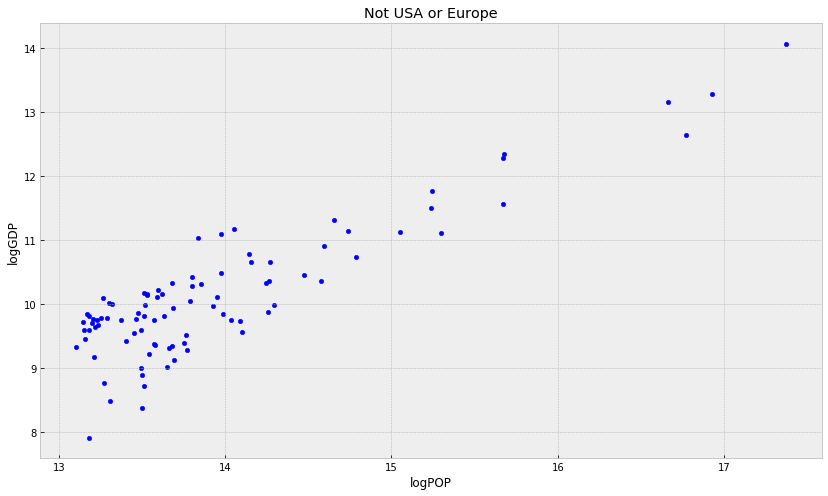

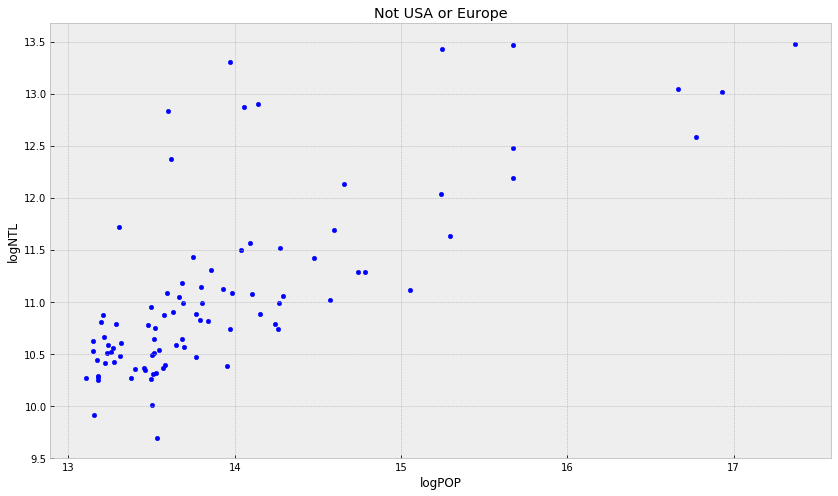

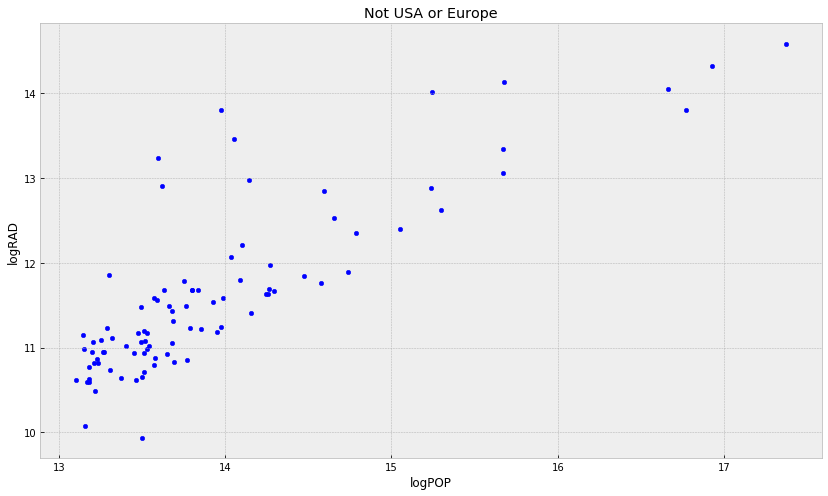

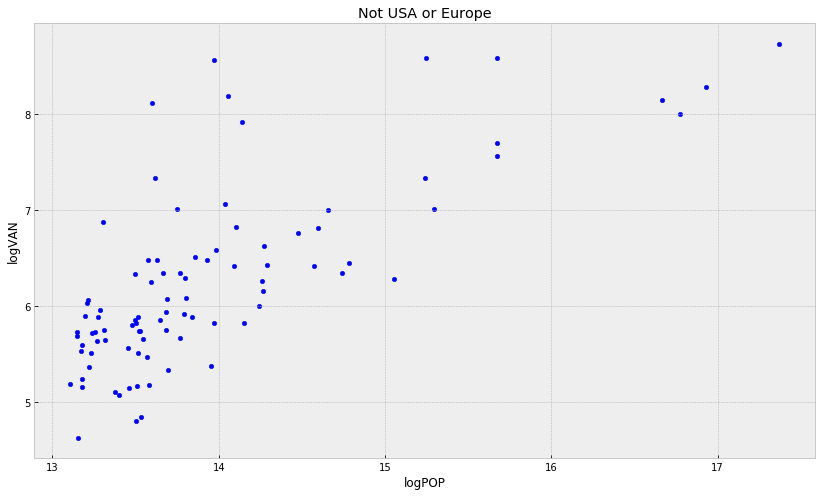

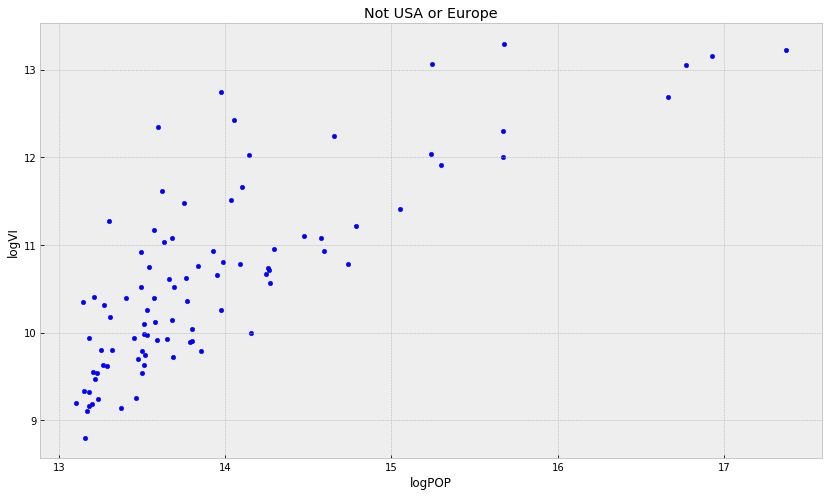

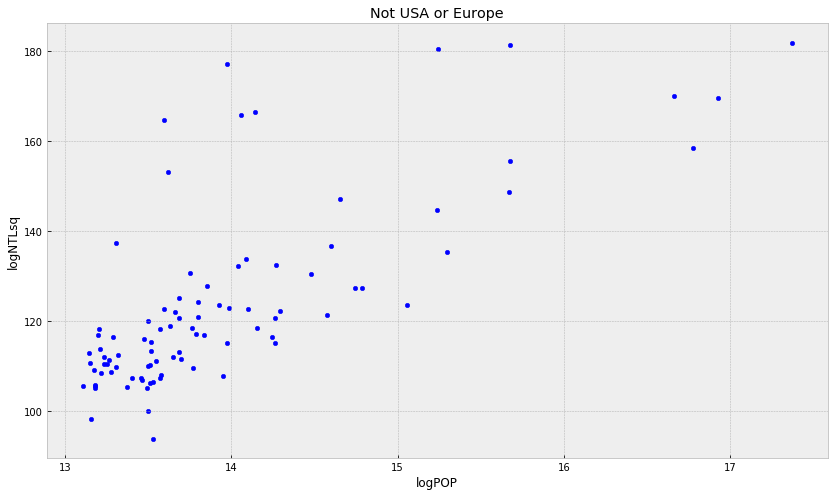

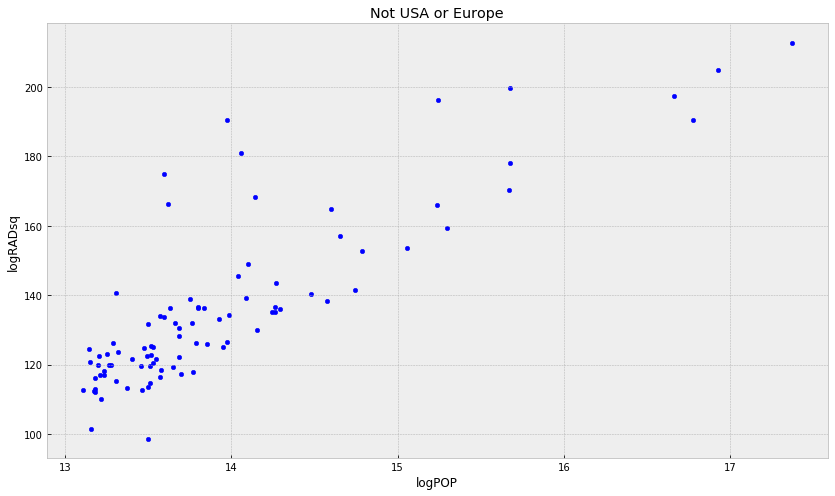

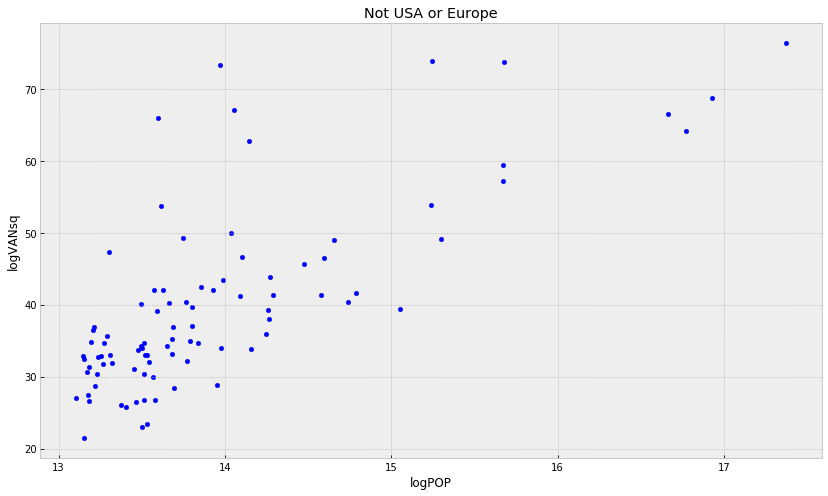

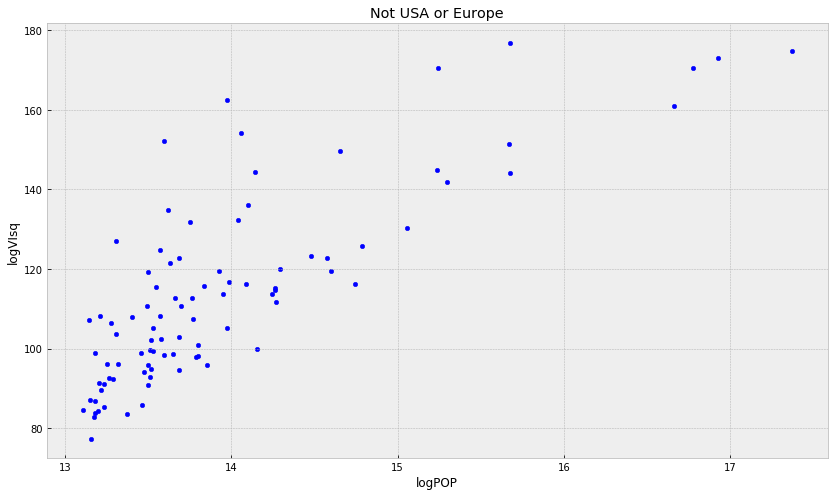

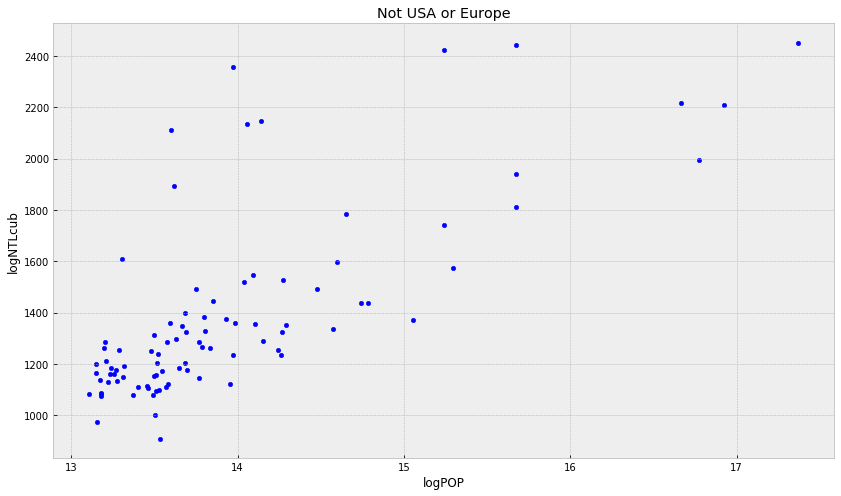

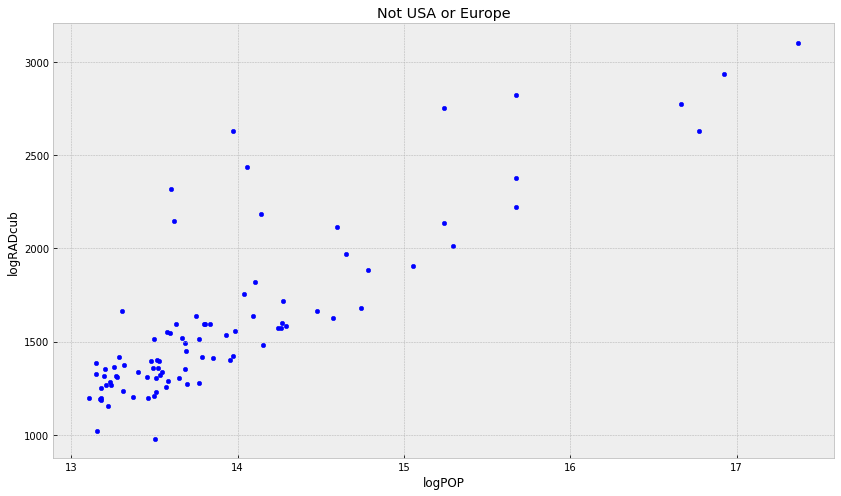

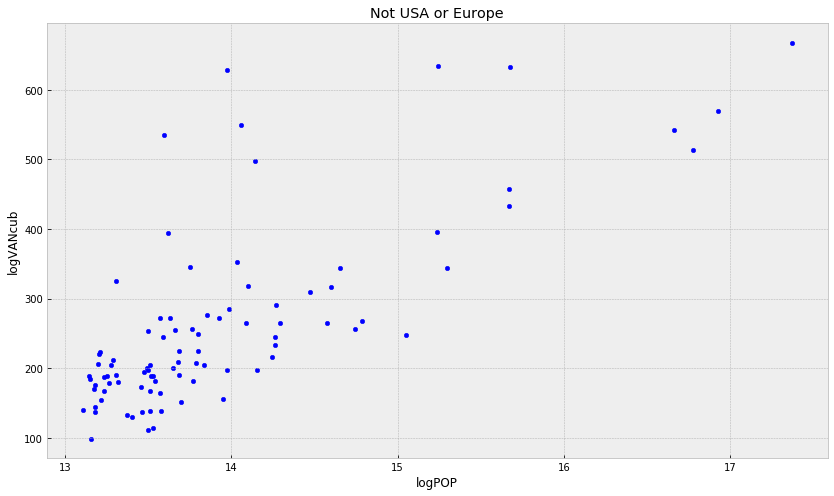

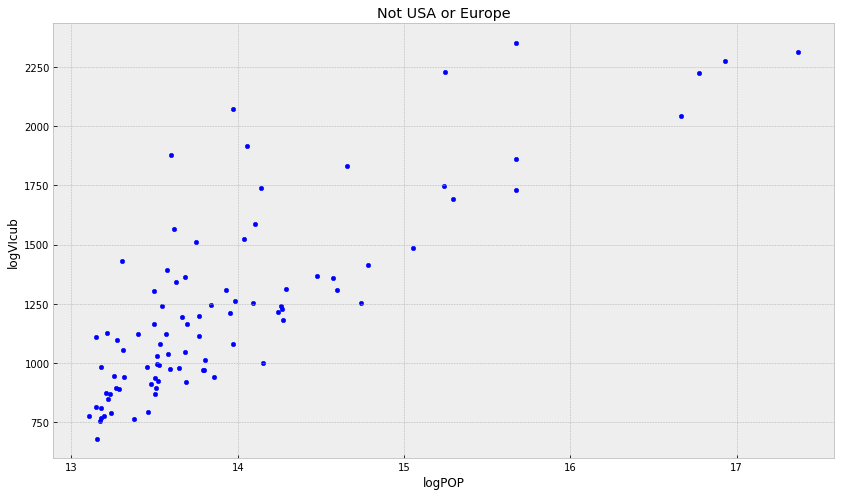

In [25]:
for pc in predicted_cols:
    plot_scatter(df=others, predicted=pc, title='Not USA or Europe')

# USA

In [22]:
usa = oecd[oecd['usmsa'] == 1].copy()

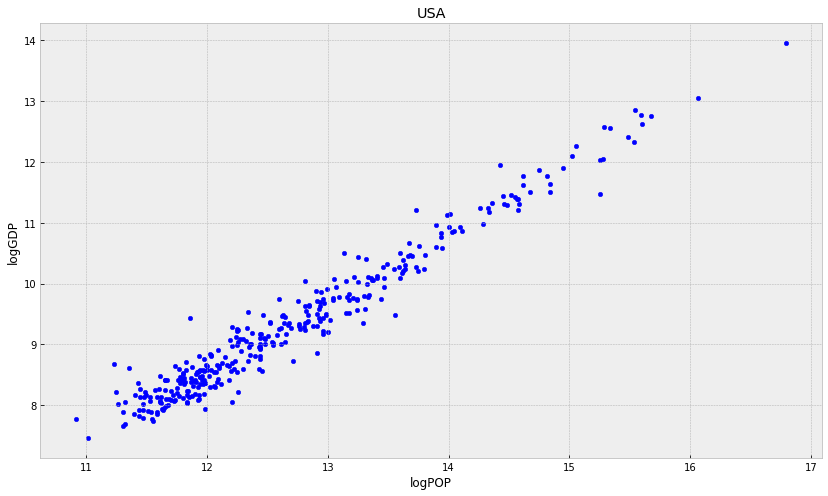

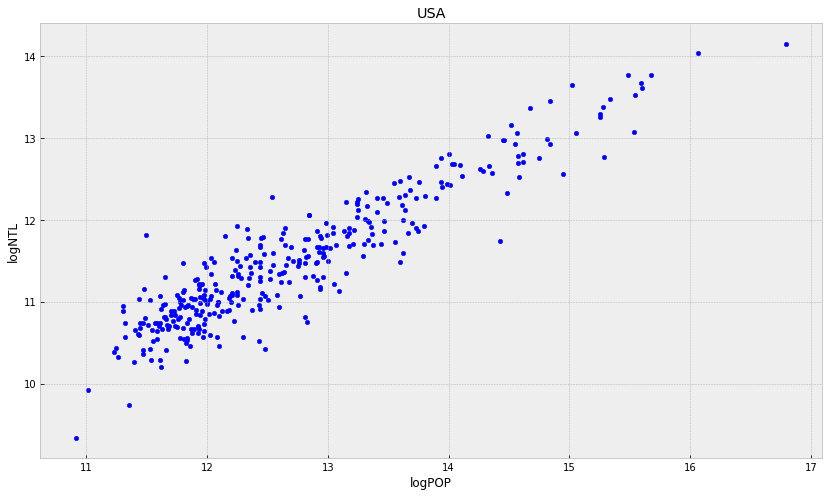

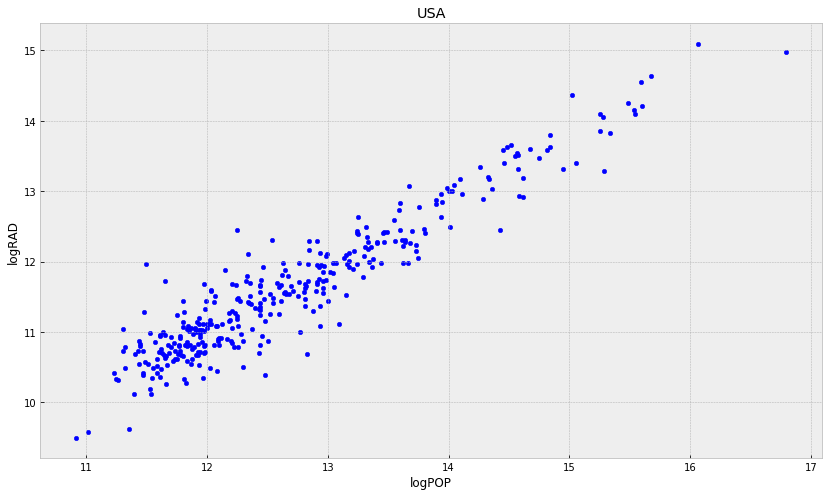

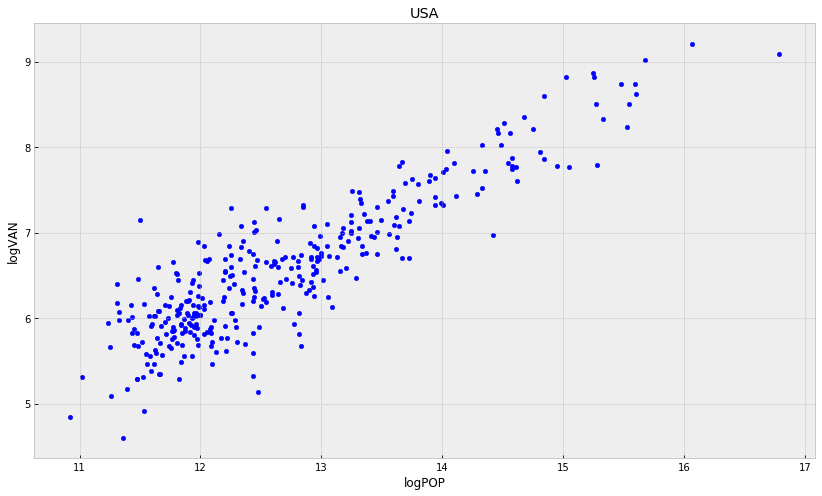

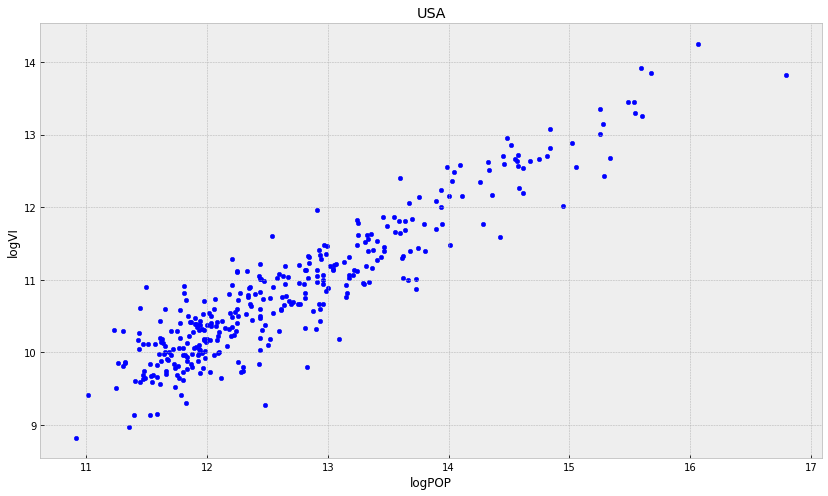

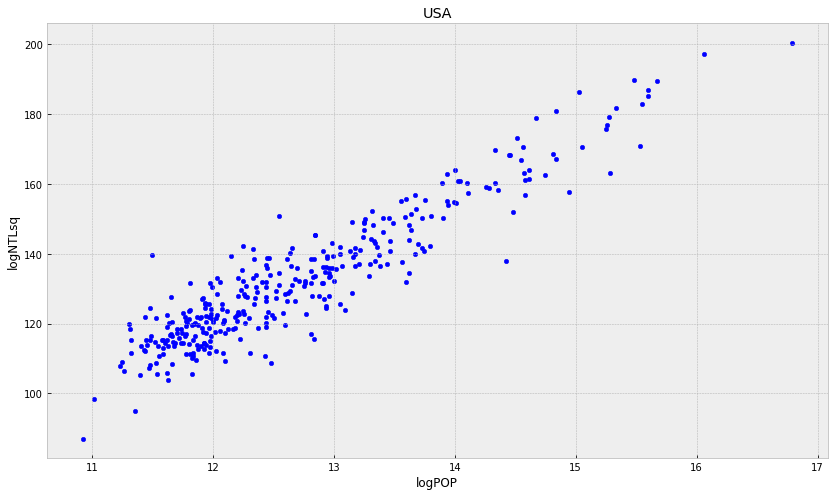

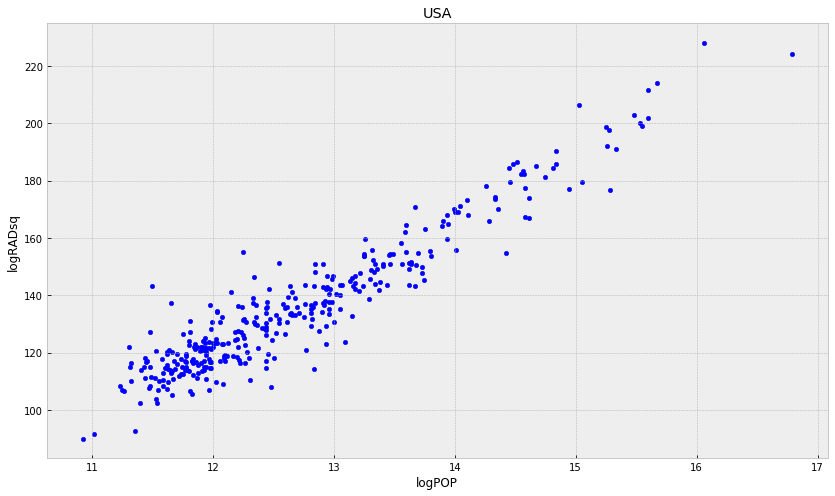

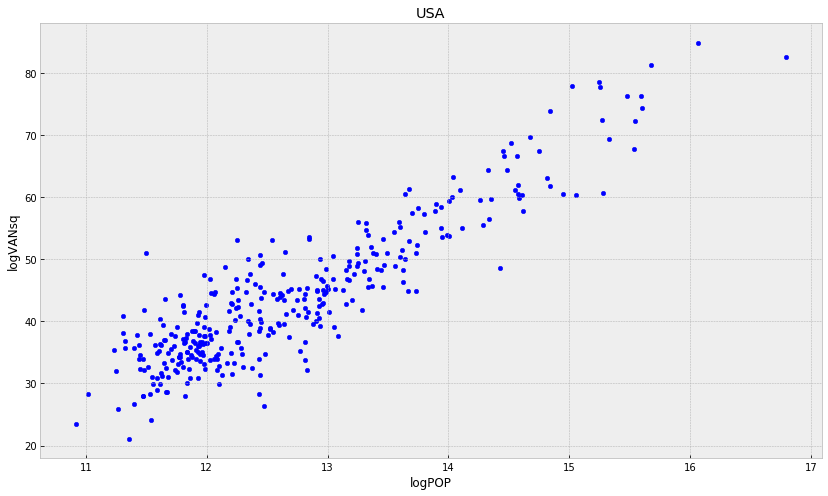

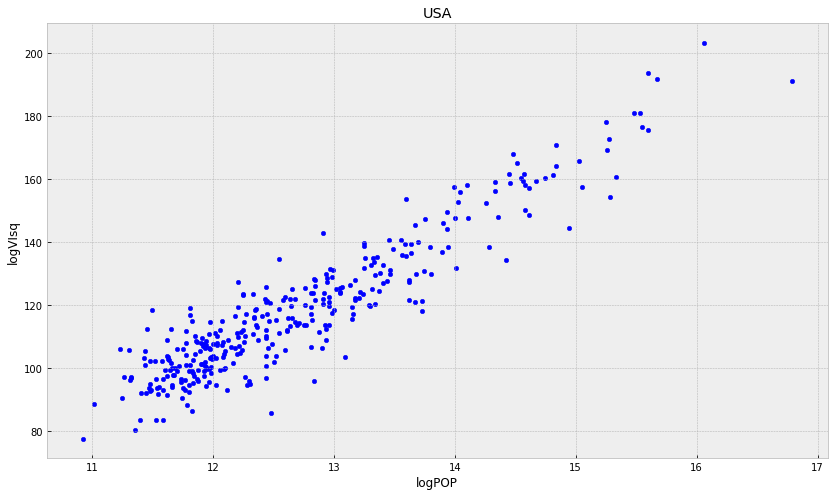

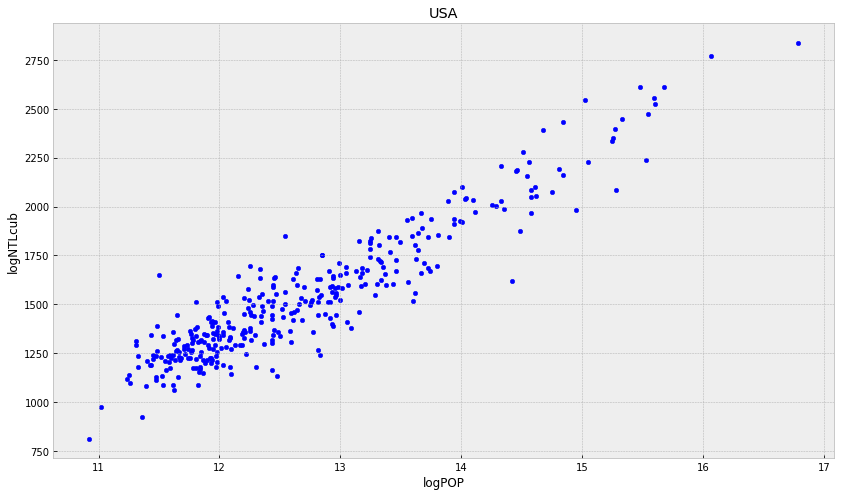

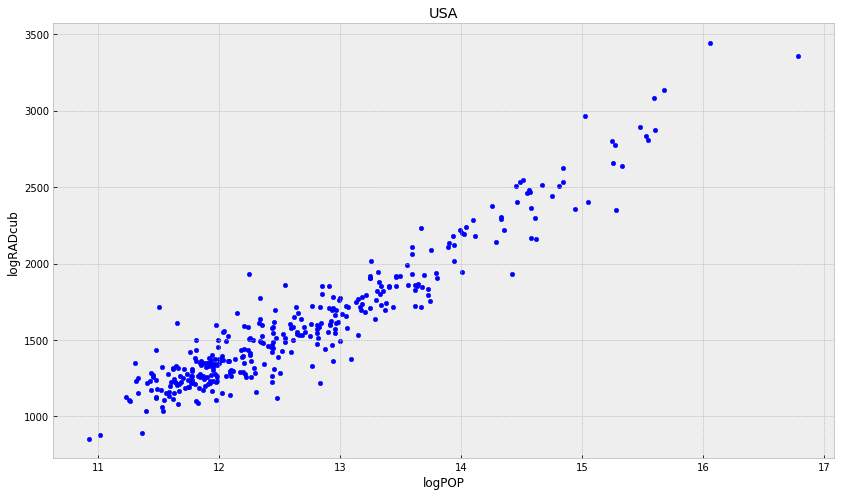

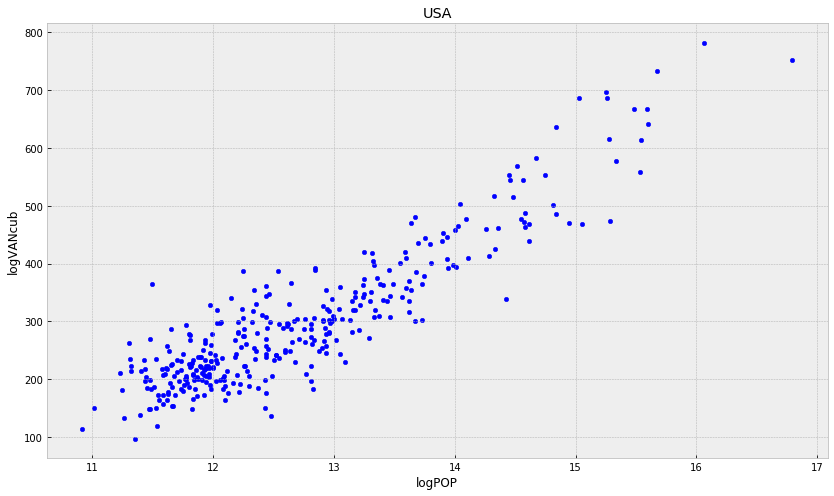

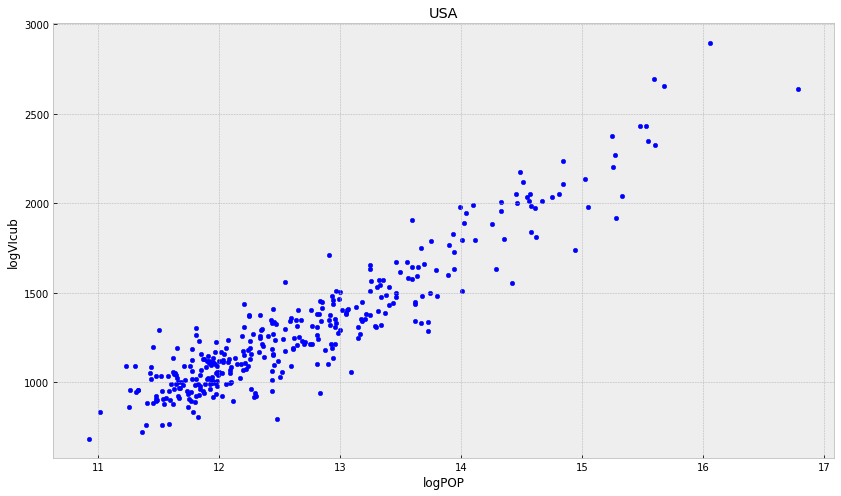

In [23]:
for pc in predicted_cols:
    plot_scatter(df=usa, predicted=pc, title='USA')

# Europe

In [19]:
europe = oecd[oecd['is_europe'] == True].copy()

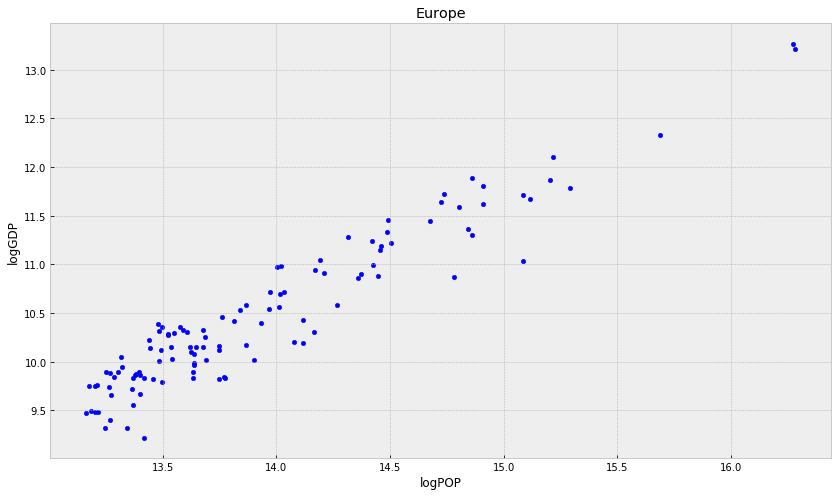

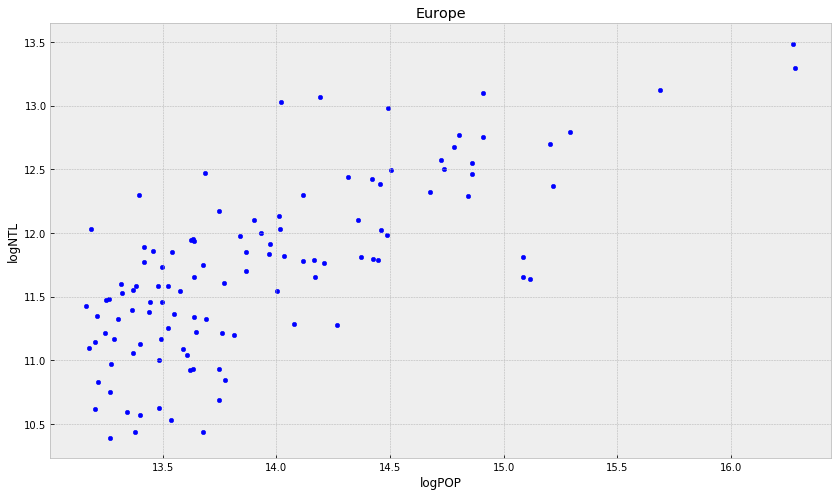

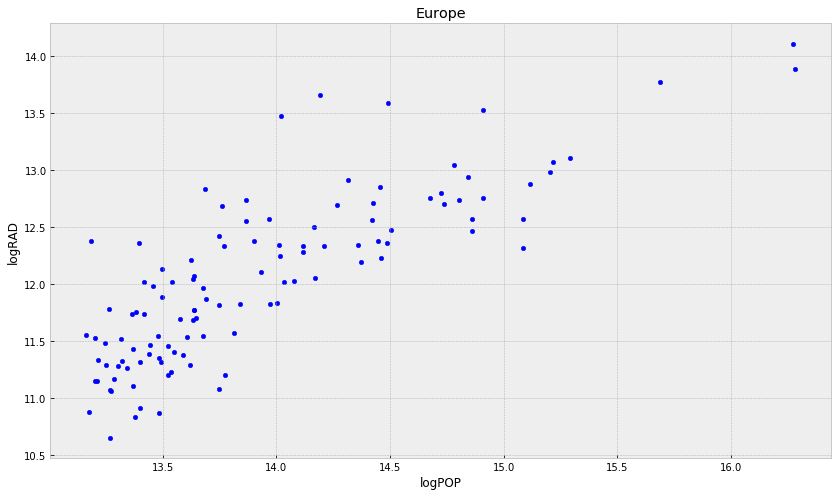

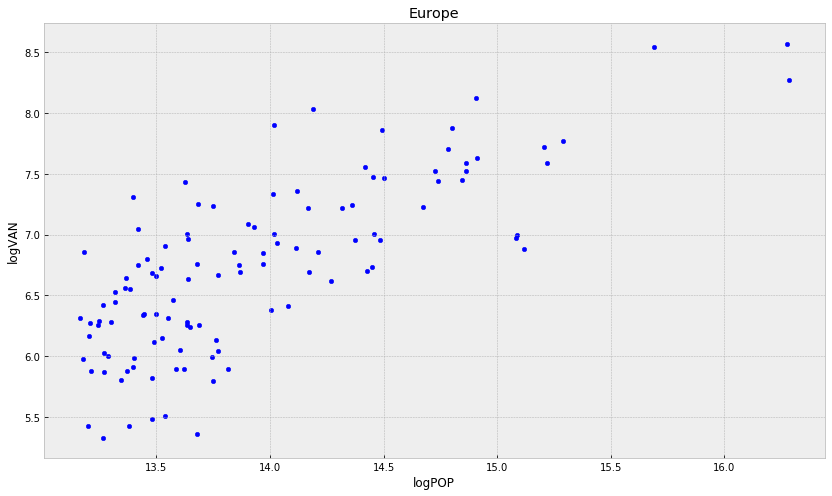

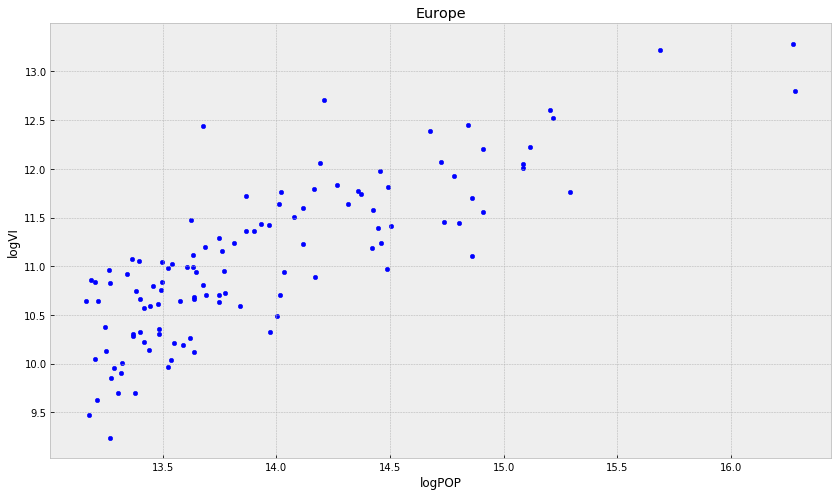

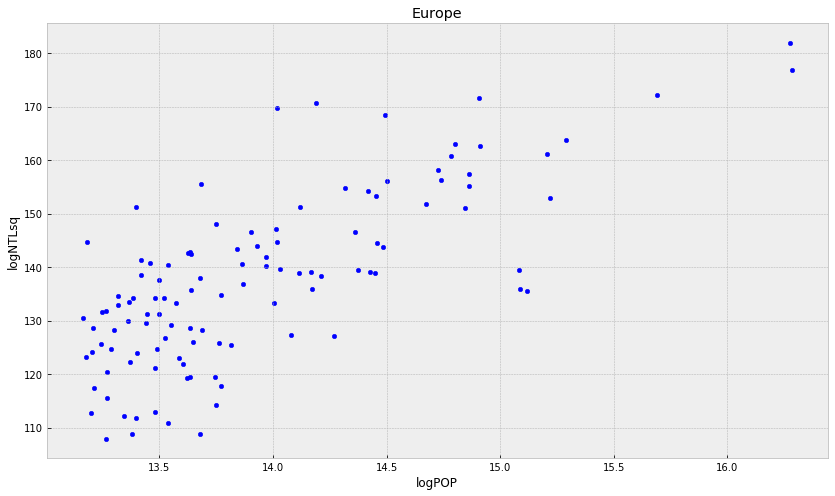

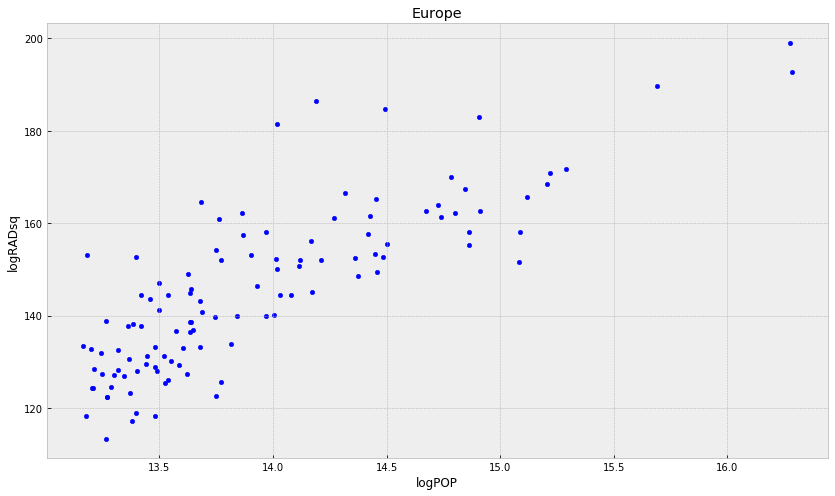

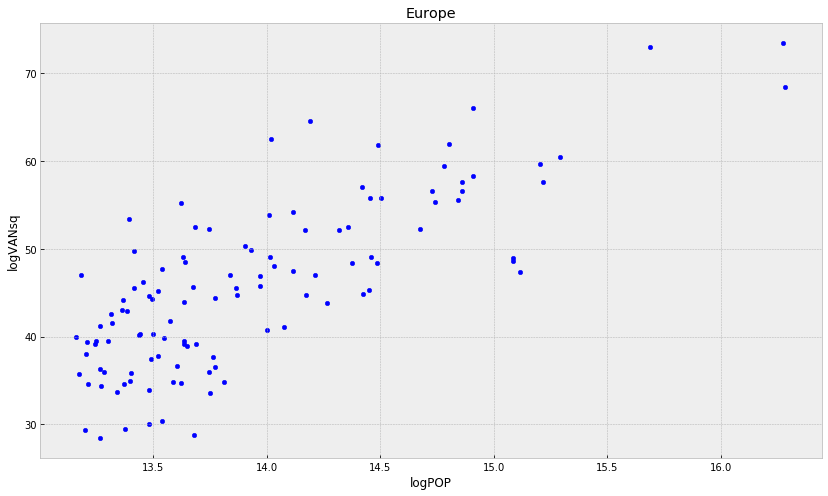

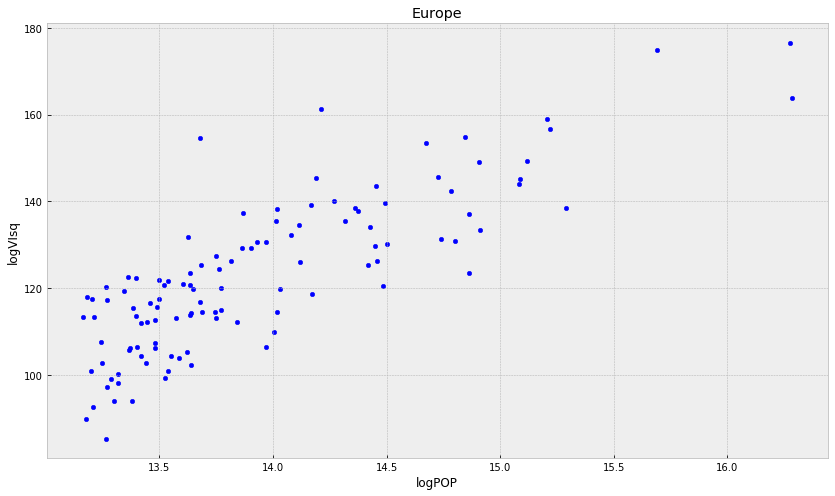

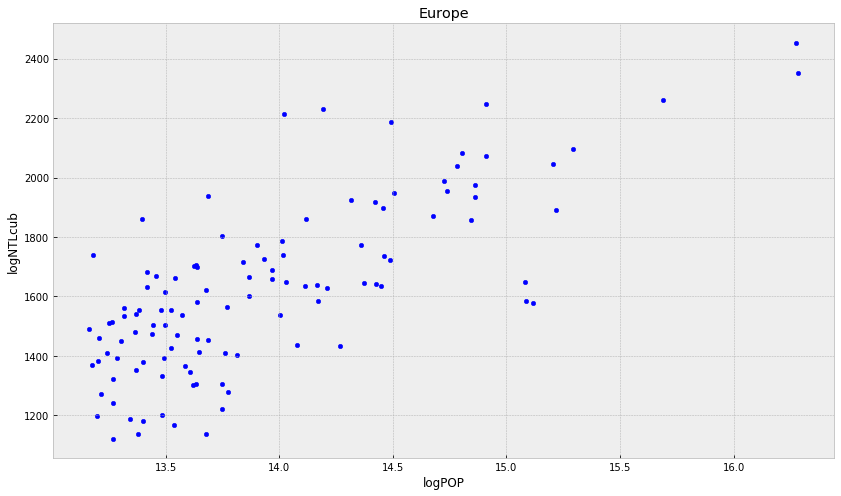

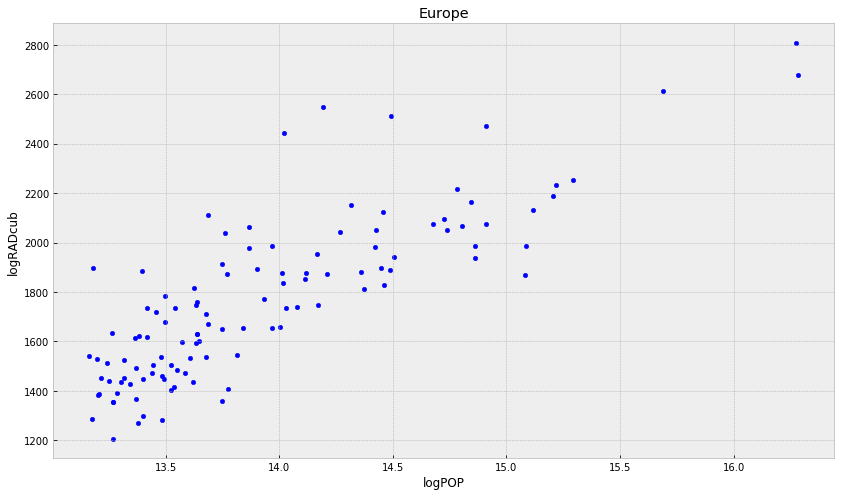

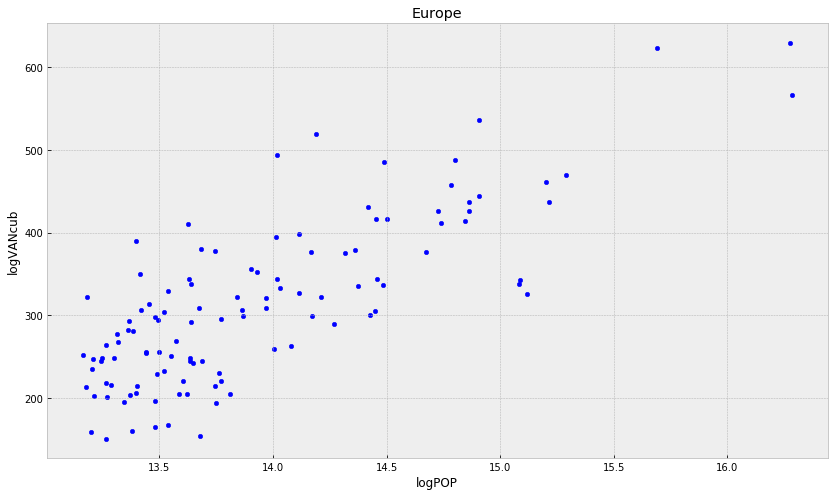

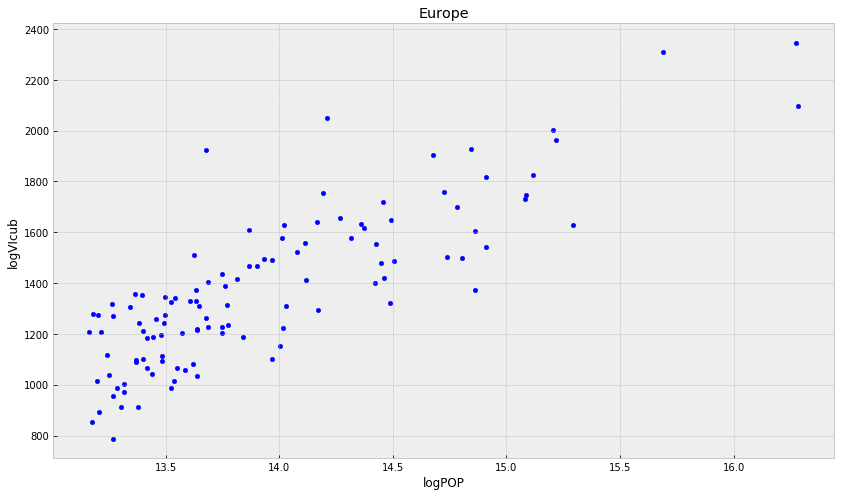

In [20]:
for pc in predicted_cols:
    plot_scatter(df=europe, predicted=pc, title='Europe')